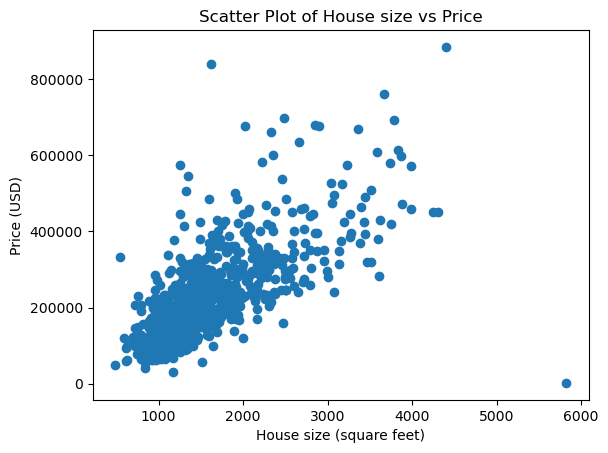

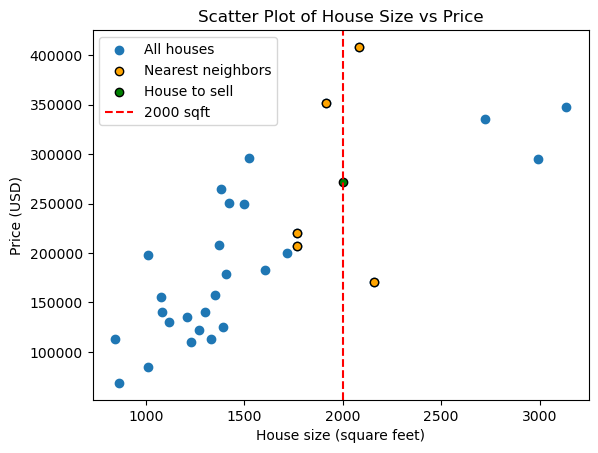

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor


# Output dataframes instead of arrays
set_config(transform_output="pandas")
sacramento = pd.read_csv("01_materials/notebooks/dataset/sacramento.csv")

plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

np.random.seed(10)
small_sacramento = sacramento.sample(n=30)
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Calculate the absolute difference between 2000 and the square footage of each house
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

# Find the 5 rows with the smallest distances (closest to 2000 square feet)
nearest_neighbors = small_sacramento.nsmallest(5, "dist")

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

plt.scatter(2000, nearest_neighbors['price'].mean(), color='green' , edgecolor='black', label='House to sell')
# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()


In [72]:
X_train, X_test, y_train, y_test = train_test_split(sacramento[['sq__ft','beds']], sacramento['price'], train_size=0.75, shuffle=True, random_state=42)

knnr = KNeighborsRegressor()
model = knnr.fit(X_train, y_train)
predictions = knnr.predict(X_test)
#plt.scatter(predictions, y_test)

model.score(X_test,y_test) #R-squered score

CV_result = cross_validate(knnr, X_train, y_train, cv=5)
pd.DataFrame(CV_result)


gridSearchObj = GridSearchCV(knnr, {'n_neighbors': range(3,100,3)})##cv=5 by dfault
gridSearchResults = gridSearchObj.fit(X_train,y_train) 

pd.DataFrame(gridSearchResults.cv_results_)
predictions_best = knnr.predict(X_test)
rmspe = ((((y_test-predictions_best)**2).sum())/y_test.shape[0])**(1/2)#RMSPE
gridSearchResults.score(X_test,y_test)
#rmspe


0.4500342224181746

In [96]:
# Create a pipeline with multiple estimators
# Create the ensemble regressor
voting_regressor = VotingRegressor([
    ('knn', KNeighborsRegressor()),  ('lr', LinearRegression())])

# Create the pipeline with preprocessing and ensemble regressor
pipeline = Pipeline([ ('scaler', StandardScaler()), ('voting', voting_regressor)])

# Define parameter grid for grid search
param_grid = [ {'voting__knn__n_neighbors': range(3, 100, 3)}, {'voting__lr__fit_intercept': [ False]} ]
gridSearchObj = GridSearchCV(pipeline, param_grid, cv=5)
gridSearchResults = gridSearchObj.fit(X_test,y_test)
gridSearchObj


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('voting',
                                        VotingRegressor(estimators=[('knn',
                                                                     KNeighborsRegressor()),
                                                                    ('lr',
                                                                     LinearRegression())]))]),
             param_grid=[{'voting__knn__n_neighbors': range(3, 100, 3)},
                         {'voting__lr__fit_intercept': [False]}])

In [100]:
best_model = gridSearchResults.best_estimator_
print("Best Models Score: " + str(best_model.score(X_test,y_test)))
print("Best Estimetor and params: " + str(gridSearchResults.best_params_))
pd.DataFrame(gridSearchResults.cv_results_)


Best Models Score: 0.4521952105749276
Best Estimetor and params: {'voting__knn__n_neighbors': 12}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting__knn__n_neighbors,param_voting__lr__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006481,0.004547,0.004673,0.003909,3,NaN,{'voting__knn__n_neighbors': 3},0.030133,0.577021,0.342673,0.171805,0.367981,0.297923,0.185701,5
1,0.006398,0.002267,0.002768,0.001441,6,NaN,{'voting__knn__n_neighbors': 6},0.051246,0.515340,0.380114,0.197544,0.385439,0.305936,0.162659,3
2,0.004795,0.006986,0.002710,0.004424,9,NaN,{'voting__knn__n_neighbors': 9},0.070314,0.497896,0.438150,0.188383,0.358292,0.310607,0.158933,2
3,0.005934,0.007310,0.004047,0.006239,12,NaN,{'voting__knn__n_neighbors': 12},0.109349,0.486711,0.438222,0.199812,0.349245,0.316668,0.142399,1
4,0.005577,0.006155,0.004185,0.006594,15,NaN,{'voting__knn__n_neighbors': 15},0.098773,0.458798,0.437196,0.186336,0.314853,0.299191,0.139763,4
5,0.005036,0.005103,0.007397,0.007260,18,NaN,{'voting__knn__n_neighbors': 18},0.104845,0.450206,0.409518,0.183854,0.319903,0.293665,0.131398,6
6,0.004876,0.006102,0.004820,0.005906,21,NaN,{'voting__knn__n_neighbors': 21},0.097230,0.444284,0.387243,0.194915,0.306037,0.285942,0.126203,7
7,0.006439,0.006895,0.000145,0.000290,24,NaN,{'voting__knn__n_neighbors': 24},0.096133,0.445986,0.364916,0.192012,0.298568,0.279523,0.123818,8
8,0.005517,0.006073,0.001160,0.001582,27,NaN,{'voting__knn__n_neighbors': 27},0.093687,0.432715,0.377035,0.190092,0.301180,0.278942,0.123270,9
9,0.006986,0.006735,0.003270,0.006539,30,NaN,{'voting__knn__n_neighbors': 30},0.102716,0.421463,0.376126,0.174676,0.297005,0.274397,0.119922,11
